## Importing libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import NearestNeighbors
import math
import seaborn as sn

In [2]:
import random
from scipy import ndarray

In [3]:
%config InlineBackend.figure_format = 'svg'

In [4]:
palette = ['paleturquoise','c']

## Import dataset

In [5]:
filename='ar1.csv'
data=pd.read_csv(filename)
data=data.as_matrix()
data.shape

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(121, 30)

In [6]:
data.data.shape

(121, 30)

In [7]:
len(data.data)

121

In [8]:
def unison_shuffled_copies(a, b):
    np.random.seed(1)##change seed 1,3,5
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

## Initializing Results list

## Creating label and feature matrices

In [9]:
labels=data[:,29]
labels.shape

(121,)

In [10]:
features=list(range(29))
features=data[:,features]
features.shape

(121, 29)

In [11]:
n_feat=len(features[1])

In [12]:
features,labels=unison_shuffled_copies(features,labels)

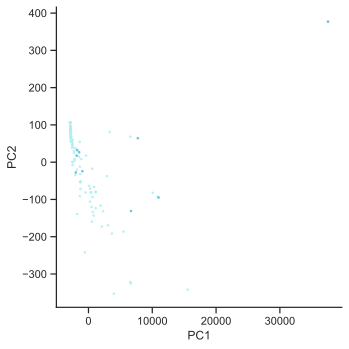

In [13]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
pc = pca.fit_transform(features)
result_baseline = pd.DataFrame(data = pc , 
        columns = ['PC1','PC2'])
result_baseline['Cluster'] = labels


sns.set(font_scale=1.2)
sns.set(rc={'figure.figsize':(12,10)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})


g_baseline=sns.lmplot( x="PC1", y="PC2",
  data=result_baseline, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=False,
  scatter_kws={"s": 3}, palette= sns.color_palette(palette) ) # specify the point size


plt.grid(False)
plt.show()

## Dividing data into training and testing datasets

In [14]:
label_1=np.where(labels == 1)[0]
label_1=list(label_1)
len(label_1)

9

In [15]:
features_1=features[label_1]
features_1=np.take(features_1,np.random.permutation(features_1.shape[0]),axis=0,out=features_1)

In [16]:
label_0=np.where(labels == 0)[0]
label_0=list(label_0)
len(label_0)

112

In [17]:
features_0=features[label_0]
features_0=np.take(features_0,np.random.permutation(features_0.shape[0]),axis=0,out=features_0)

In [18]:
a=len(features_1)//3
b=len(features_0)//3

In [19]:
fold_1_min=features_1[0:a]
fold_1_maj=features_0[0:b]
fold_1_tst=np.concatenate((fold_1_min,fold_1_maj))
lab_1_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [20]:
fold_2_min=features_1[a:2*a]
fold_2_maj=features_0[b:2*b]
fold_2_tst=np.concatenate((fold_2_min,fold_2_maj))
lab_2_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [21]:
fold_3_min=features_1[2*a:3*a]
fold_3_maj=features_0[2*b:3*b]
fold_3_tst=np.concatenate((fold_3_min,fold_3_maj))
lab_3_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [22]:
fold_1_trn=np.concatenate((fold_2_min,fold_3_min, fold_2_maj,fold_3_maj))

In [23]:
lab_1_trn=np.concatenate((np.zeros(len(fold_2_min)+len(fold_3_min))+1,np.zeros(len(fold_2_maj)+len(fold_3_maj))))

In [24]:
fold_2_trn=np.concatenate((fold_1_min,fold_3_min, fold_1_maj,fold_3_maj))

In [25]:
lab_2_trn=np.concatenate((np.zeros(len(fold_1_min)+len(fold_3_min))+1,np.zeros(len(fold_1_maj)+len(fold_3_maj))))

In [26]:
fold_3_trn=np.concatenate((fold_1_min,fold_2_min, fold_1_maj,fold_2_maj))

In [27]:
lab_3_trn=np.concatenate((np.zeros(len(fold_1_min)+len(fold_2_min))+1,np.zeros(len(fold_1_maj)+len(fold_2_maj))))

In [28]:
training_folds_feats=[fold_1_trn,fold_2_trn,fold_3_trn]

In [29]:
testing_folds_feats=[fold_1_tst,fold_2_tst,fold_3_tst]

In [30]:
training_folds_labels=[lab_1_trn,lab_2_trn,lab_3_trn]

In [31]:
testing_folds_labels=[lab_1_tst,lab_2_tst,lab_3_tst]

In [32]:
def lr(X_train,y_train,X_test,y_test):
    from sklearn import metrics
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import balanced_accuracy_score
    from sklearn.metrics import cohen_kappa_score
    logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial', class_weight={0: 1, 1: 1})
    logreg.fit(X_train, y_train)
    y_pred= logreg.predict(X_test)
    y_proba=logreg.predict_proba(X_test)[:, 1]
    con_mat=confusion_matrix(y_test,y_pred)
    bal_acc=balanced_accuracy_score(y_test,y_pred)
    tn, fp, fn, tp = con_mat.ravel()
    print('tn, fp, fn, tp:', tn, fp, fn, tp)
    f1 = f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    aps=average_precision_score(y_test,y_proba)
    print('balanced accuracy_LR:', bal_acc)
    print('f1 score_LR:', f1)
    print('kappa:',kappa)
    print('average_precision_score:', aps)
    print('confusion matrix_LR',con_mat)
    return(f1, bal_acc, aps, con_mat)

In [33]:
def svm(X_train,y_train,X_test,y_test):
    from sklearn import preprocessing
    from sklearn import metrics
    from sklearn import svm
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import balanced_accuracy_score
    from sklearn.metrics import cohen_kappa_score
    X_train = preprocessing.scale(X_train)
    X_test = preprocessing.scale(X_test)
    svm= svm.SVC(kernel='linear', decision_function_shape='ovo', class_weight={0: 1., 1: 1.},probability=True)
    svm.fit(X_train, y_train)
    y_pred= svm.predict(X_test)
    y_proba=svm.predict_proba(X_test)[:, 1]
    con_mat=confusion_matrix(y_test,y_pred)
    bal_acc=balanced_accuracy_score(y_test,y_pred)
    aps=average_precision_score(y_test,y_proba)
    tn, fp, fn, tp = con_mat.ravel()
    print('tn, fp, fn, tp:', tn, fp, fn, tp)
    f1 = f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    print('balanced accuracy_SVM:', bal_acc)
    print('f1 score_SVM:', f1)
    print('kappa:',kappa)
    print('average_precision_score:', aps)
    print('confusion matrix_SVM',con_mat)
    return( f1, bal_acc , aps, con_mat)

In [34]:
def knn(X_train,y_train,X_test,y_test):
    from sklearn import metrics
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import balanced_accuracy_score
    from sklearn.metrics import cohen_kappa_score
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(X_train, y_train)
    y_pred= knn.predict(X_test)
    y_proba=knn.predict_proba(X_test)[:, 1]
    con_mat=confusion_matrix(y_test,y_pred)
    bal_acc=balanced_accuracy_score(y_test,y_pred)
    aps=average_precision_score(y_test,y_proba)
    tn, fp, fn, tp = con_mat.ravel()
    print('tn, fp, fn, tp:', tn, fp, fn, tp)
    print('balanced accuracy_KNN:', bal_acc)
    f1 = f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    print('f1 score_KNN:', f1)
    print('kappa:',kappa)
    print('average_precision_score:', aps)
    print('confusion matrix_KNN',con_mat)
    return(f1, bal_acc, aps, con_mat)

In [35]:
def Neb_grps(data,near_neb):
    nbrs = NearestNeighbors(n_neighbors=near_neb, algorithm='ball_tree').fit(data)
    distances, indices = nbrs.kneighbors(data)
    neb_class=[]
    for i in (indices):
        neb_class.append(i)
    return(np.asarray(neb_class)) 

def LoRAS(data,num_samples,shadow,sigma,num_RACOS,num_afcomb):
    np.random.seed(42)
    data_shadow=([])
    for i in range (num_samples):
        c=0
        while c<shadow:
            data_shadow.append(data[i]+np.random.normal(0,sigma))
            c=c+1
    data_shadow==np.asarray(data_shadow)
    data_shadow_lc=([])
    for i in range(num_RACOS):
        idx = np.random.randint(shadow*num_samples, size=num_afcomb)
        w=np.random.randint(100, size=len(idx))
        aff_w=np.asarray(w/sum(w))
        data_tsl=np.array(data_shadow)[idx,:]
        data_tsl_=np.dot(aff_w, data_tsl)
        data_shadow_lc.append(data_tsl_)
    return(np.asarray(data_shadow_lc))   

def LoRAS_gen(num_samples,shadow,sigma,num_RACOS,num_afcomb):
    RACOS_set=[]
    for i in range (len(nb_list)):
        RACOS_i= LoRAS(features_1_trn[nb_list[i]],num_samples,shadow,sigma,num_RACOS,num_afcomb)
        RACOS_set.append(RACOS_i)
    LoRAS_set=np.asarray(RACOS_set)
    LoRAS_1=np.reshape(LoRAS_set,(len(features_1_trn)*num_RACOS,n_feat))
    return(np.concatenate((LoRAS_1,features_1_trn)))

In [36]:
import smote_variants as sv
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE 

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [37]:
def OVS(training_data,training_labels,neb):
    
    smote_mot2ld = sv.MOT2LD(random_state=62, k = neb)
    SMOTE_feat_mot2ld, SMOTE_labels_mot2ld = smote_mot2ld.sample(training_data, training_labels)
    
    smote_dbsmote = sv.DBSMOTE(random_state=62, )
    SMOTE_feat_dbsmote, SMOTE_labels_dbsmote = smote_dbsmote.sample(training_data, training_labels)
    
    smote_cure = sv.CURE_SMOTE(random_state=62, )
    SMOTE_feat_cure, SMOTE_labels_cure = smote_cure.sample(training_data, training_labels)
    
    smote_SOMO = sv.SOMO(random_state=62)
    SMOTE_feat_SOMO, SMOTE_labels_SOMO = smote_SOMO.sample(training_data, training_labels)
    
    sm = SMOTE(random_state=62, k_neighbors=neb, sampling_strategy=1)
    SMOTE_feat, SMOTE_labels = sm.fit_resample(training_data,training_labels)
    
    
    return(SMOTE_feat, SMOTE_labels, SMOTE_feat_mot2ld, SMOTE_labels_mot2ld, SMOTE_feat_dbsmote, SMOTE_labels_dbsmote,\
          SMOTE_feat_cure, SMOTE_labels_cure, SMOTE_feat_SOMO, SMOTE_labels_SOMO)

In [38]:
LR=[]
SVM=[]
KNN=[] 
LR_SM=[]
SVM_SM=[]
KNN_SM=[]
LR_MOT2TLD=[]
SVM_MOT2TLD=[]
KNN_MOT2TLD=[] 
LR_DBSMOTE=[]
SVM_DBSMOTE=[]
KNN_DBSMOTE=[] 
LR_CURE=[]
SVM_CURE=[]
KNN_CURE=[] 
LR_SOMO=[]
SVM_SOMO=[]
KNN_SOMO=[] 



i=0
while i<3:
    SMOTE_feat, SMOTE_labels, SMOTE_feat_mot2ld, SMOTE_labels_mot2ld, SMOTE_feat_dbsmote, SMOTE_labels_dbsmote, SMOTE_feat_cure, SMOTE_labels_cure, SMOTE_feat_SOMO, SMOTE_labels_SOMO=OVS(training_folds_feats[i],training_folds_labels[i],3)
    
    f1_lr, bal_acc_lr, aps_lr, mat_lr=lr(training_folds_feats[i],training_folds_labels[i],testing_folds_feats[i],testing_folds_labels[i])
    LR.append([f1_lr, aps_lr, bal_acc_lr])
    f1_svm,bal_acc_svm,aps_svm,mat_svm=svm(training_folds_feats[i],training_folds_labels[i],testing_folds_feats[i],testing_folds_labels[i])
    SVM.append([f1_svm,bal_acc_svm,aps_svm])
    f1_knn,bal_acc_knn,aps_knn,mat_knn=knn(training_folds_feats[i],training_folds_labels[i],testing_folds_feats[i],testing_folds_labels[i])
    KNN.append([f1_knn,bal_acc_knn,aps_knn])
    
    f1_lr_SMOTE,bal_acc_lr_SMOTE, aps_lr_SMOTE, mat_lr_SMOTE=lr(SMOTE_feat,SMOTE_labels,testing_folds_feats[i],testing_folds_labels[i])
    LR_SM.append([f1_lr_SMOTE, bal_acc_lr_SMOTE, aps_lr_SMOTE])
    f1_svm_SMOTE,bal_acc_svm_SMOTE,aps_svm_SMOTE,mat_svm_SMOTE=svm(SMOTE_feat,SMOTE_labels,testing_folds_feats[i],testing_folds_labels[i])
    SVM_SM.append([f1_svm_SMOTE, bal_acc_svm_SMOTE, aps_svm_SMOTE])
    f1_knn_SMOTE,bal_acc_knn_SMOTE, aps_knn_SMOTE, mat_knn_SMOTE=knn(SMOTE_feat,SMOTE_labels,testing_folds_feats[i],testing_folds_labels[i])
    KNN_SM.append([f1_knn_SMOTE,bal_acc_knn_SMOTE,aps_knn_SMOTE])
        
    f1_lr_SMOTE_mot2ld,bal_acc_lr_SMOTE_mot2ld, aps_lr_SMOTE_mot2ld, mat_lr_SMOTE_mot2ld=lr(SMOTE_feat_mot2ld,SMOTE_labels_mot2ld,testing_folds_feats[i],testing_folds_labels[i])
    LR_MOT2TLD.append([f1_lr_SMOTE_mot2ld,bal_acc_lr_SMOTE_mot2ld, aps_lr_SMOTE_mot2ld])
    f1_svm_SMOTE_mot2ld,bal_acc_svm_SMOTE_mot2ld, aps_svm_SMOTE_mot2ld, mat_svm_SMOTE_mot2ld=svm(SMOTE_feat_mot2ld,SMOTE_labels_mot2ld,testing_folds_feats[i],testing_folds_labels[i])
    SVM_MOT2TLD.append([f1_svm_SMOTE_mot2ld,bal_acc_svm_SMOTE_mot2ld, aps_svm_SMOTE_mot2ld])
    f1_knn_SMOTE_mot2ld,bal_acc_knn_SMOTE_mot2ld, aps_knn_SMOTE_mot2ld, mat_knn_SMOTE_mot2ld=knn(SMOTE_feat_mot2ld,SMOTE_labels_mot2ld,testing_folds_feats[i],testing_folds_labels[i])
    KNN_MOT2TLD.append([f1_knn_SMOTE_mot2ld,bal_acc_knn_SMOTE_mot2ld, aps_knn_SMOTE_mot2ld])
    
    f1_lr_SMOTE_dbsmote,bal_acc_lr_SMOTE_dbsmote, aps_lr_SMOTE_dbsmote, mat_lr_SMOTE_dbsmote=lr(SMOTE_feat_dbsmote,SMOTE_labels_dbsmote,testing_folds_feats[i],testing_folds_labels[i])
    LR_DBSMOTE.append([f1_lr_SMOTE_dbsmote,bal_acc_lr_SMOTE_dbsmote, aps_lr_SMOTE_dbsmote])
    f1_svm_SMOTE_dbsmote,bal_acc_svm_SMOTE_dbsmote, aps_svm_SMOTE_dbsmote, mat_svm_SMOTE_dbsmote=svm(SMOTE_feat_dbsmote,SMOTE_labels_dbsmote,testing_folds_feats[i],testing_folds_labels[i])
    SVM_DBSMOTE.append([f1_svm_SMOTE_dbsmote,bal_acc_svm_SMOTE_dbsmote, aps_svm_SMOTE_dbsmote])
    f1_knn_SMOTE_dbsmote,bal_acc_knn_SMOTE_dbsmote,aps_knn_SMOTE_dbsmote,mat_knn_SMOTE_dbsmote=knn(SMOTE_feat_dbsmote,SMOTE_labels_dbsmote,testing_folds_feats[i],testing_folds_labels[i])
    KNN_DBSMOTE.append([f1_knn_SMOTE_dbsmote,bal_acc_knn_SMOTE_dbsmote,aps_knn_SMOTE_dbsmote])
    
    f1_lr_SMOTE_cure,bal_acc_lr_SMOTE_cure,aps_lr_SMOTE_cure,mat_lr_SMOTE_cure=lr(SMOTE_feat_cure, SMOTE_labels_cure,testing_folds_feats[i],testing_folds_labels[i])
    LR_CURE.append([f1_lr_SMOTE_cure,bal_acc_lr_SMOTE_cure,aps_lr_SMOTE_cure])
    f1_svm_SMOTE_cure,bal_acc_svm_SMOTE_cure,aps_svm_SMOTE_cure,mat_svm_SMOTE_cure=svm(SMOTE_feat_cure, SMOTE_labels_cure,testing_folds_feats[i],testing_folds_labels[i])
    SVM_CURE.append([f1_svm_SMOTE_cure,bal_acc_svm_SMOTE_cure,aps_svm_SMOTE_cure])
    f1_knn_SMOTE_cure,bal_acc_knn_SMOTE_cure,aps_knn_SMOTE_cure,mat_knn_SMOTE_cure=knn(SMOTE_feat_cure, SMOTE_labels_cure,testing_folds_feats[i],testing_folds_labels[i])
    KNN_CURE.append([f1_knn_SMOTE_cure,bal_acc_knn_SMOTE_cure,aps_knn_SMOTE_cure])
    
    f1_lr_SMOTE_SOMO,bal_acc_lr_SMOTE_SOMO,aps_lr_SMOTE_SOMO,mat_lr_SMOTE_SOMO=lr(SMOTE_feat_SOMO, SMOTE_labels_SOMO,testing_folds_feats[i],testing_folds_labels[i])
    LR_SOMO.append([f1_lr_SMOTE_SOMO,bal_acc_lr_SMOTE_SOMO,aps_lr_SMOTE_SOMO])
    f1_svm_SMOTE_SOMO,bal_acc_svm_SMOTE_SOMO,aps_svm_SMOTE_SOMO,mat_svm_SMOTE_SOMO=svm(SMOTE_feat_SOMO, SMOTE_labels_SOMO,testing_folds_feats[i],testing_folds_labels[i])
    SVM_SOMO.append([f1_svm_SMOTE_SOMO,bal_acc_svm_SMOTE_SOMO,aps_svm_SMOTE_SOMO])
    f1_knn_SMOTE_SOMO,bal_acc_knn_SMOTE_SOMO,aps_knn_SMOTE_SOMO,mat_knn_SMOTE_SOMO=knn(SMOTE_feat_SOMO, SMOTE_labels_SOMO,testing_folds_feats[i],testing_folds_labels[i])
    KNN_SOMO.append([f1_knn_SMOTE_SOMO,bal_acc_knn_SMOTE_SOMO,aps_knn_SMOTE_SOMO])

    i=i+1

2020-11-29 09:27:03,422:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 3, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-11-29 09:27:03,424:INFO:MOT2LD: starting TSNE n: 80 d: 29


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 80 samples in 0.000s...
[t-SNE] Computed neighbors for 80 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 80 / 80
[t-SNE] Mean sigma: 53.980592
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 57.0405502, gradient norm = 0.4788074 (50 iterations in 0.022s)
[t-SNE] Iteration 100: error = 52.4301262, gradient norm = 0.5035908 (50 iterations in 0.024s)
[t-SNE] Iteration 150: error = 55.4490242, gradient norm = 0.4848016 (50 iterations in 0.025s)
[t-SNE] Iteration 200: error = 53.0947762, gradient norm = 0.5297377 (50 iterations in 0.022s)
[t-SNE] Iteration 250: error = 57.0835953, gradient norm = 0.4165371 (50 iterations in 0.024s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.083595
[t-SNE] Iteration 300: error = 1.0592346, gradient norm = 0.0050414 (50 iterations in 0.021s)
[t-SNE] Iteration 350: error = 0.9302201, gradient norm = 0.0050938 (50 

2020-11-29 09:27:03,661:INFO:MOT2LD: TSNE finished
2020-11-29 09:27:03,679:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-29 09:27:03,685:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-11-29 09:27:03,686:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x00000222F556E318>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-29 09:27


[t-SNE] Iteration 450: error = 0.4319352, gradient norm = 0.0006001 (50 iterations in 0.023s)
[t-SNE] Iteration 500: error = 0.4615170, gradient norm = 0.0032104 (50 iterations in 0.023s)
[t-SNE] KL divergence after 500 iterations: 0.461517
tn, fp, fn, tp: 35 2 3 0
balanced accuracy_LR: 0.47297297297297297
f1 score_LR: 0.0
kappa: -0.06382978723404253
average_precision_score: 0.068218954248366
confusion matrix_LR [[35  2]
 [ 3  0]]
tn, fp, fn, tp: 36 1 3 0
balanced accuracy_SVM: 0.4864864864864865
f1 score_SVM: 0.0
kappa: -0.038961038961039085
average_precision_score: 0.15893227692888134
confusion matrix_SVM [[36  1]
 [ 3  0]]
tn, fp, fn, tp: 37 0 3 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.3333333333333333
confusion matrix_KNN [[37  0]
 [ 3  0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterat

tn, fp, fn, tp: 31 6 3 0
balanced accuracy_LR: 0.4189189189189189
f1 score_LR: 0.0
kappa: -0.11111111111111116
average_precision_score: 0.08439659755449229
confusion matrix_LR [[31  6]
 [ 3  0]]
tn, fp, fn, tp: 25 12 2 1
balanced accuracy_SVM: 0.5045045045045045
f1 score_SVM: 0.125
kappa: 0.003558718861210064
average_precision_score: 0.11468253968253969
confusion matrix_SVM [[25 12]
 [ 2  1]]
tn, fp, fn, tp: 32 5 2 1
balanced accuracy_KNN: 0.5990990990990991
f1 score_KNN: 0.2222222222222222
kappa: 0.1358024691358024
average_precision_score: 0.26666666666666666
confusion matrix_KNN [[32  5]
 [ 2  1]]
tn, fp, fn, tp: 37 0 3 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.07222222222222222
confusion matrix_LR [[37  0]
 [ 3  0]]
tn, fp, fn, tp: 30 7 2 1
balanced accuracy_SVM: 0.5720720720720721
f1 score_SVM: 0.18181818181818182
kappa: 0.08163265306122458
average_precision_score: 0.12506393861892584
confusion matrix_SVM [[30  7]
 [ 2  1]]
tn, fp, fn, tp: 3

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

confusion matrix_SVM [[28  9]
 [ 1  2]]
tn, fp, fn, tp: 36 1 3 0
balanced accuracy_KNN: 0.4864864864864865
f1 score_KNN: 0.0
kappa: -0.038961038961039085
average_precision_score: 0.3333333333333333
confusion matrix_KNN [[36  1]
 [ 3  0]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 80 samples in 0.000s...
[t-SNE] Computed neighbors for 80 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 80 / 80
[t-SNE] Mean sigma: 6.243719
[t-SNE] Computed conditional probabilities in 0.003s
[t-SNE] Iteration 50: error = 61.2922592, gradient norm = 0.4644698 (50 iterations in 0.024s)
[t-SNE] Iteration 100: error = 57.9356842, gradient norm = 0.4800319 (50 iterations in 0.023s)
[t-SNE] Iteration 150: error = 60.5646820, gradient norm = 0.4325459 (50 iterations in 0.022s)
[t-SNE] Iteration 200: error = 57.9060745, gradient norm = 0.4523926 (50 iterations in 0.023s)
[t-SNE] Iteration 250: error = 57.7219315, gradient norm = 0.5128021 (50 iterations in 0.022s)
[t-SNE]

2020-11-29 09:27:04,233:INFO:MOT2LD: TSNE finished
2020-11-29 09:27:04,247:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-29 09:27:04,250:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-11-29 09:27:04,251:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x00000222F69AC098>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-29 09:27


[t-SNE] Iteration 450: error = 0.5384632, gradient norm = 0.0013200 (50 iterations in 0.023s)
[t-SNE] Iteration 500: error = 0.8029755, gradient norm = 0.0006076 (50 iterations in 0.024s)
[t-SNE] KL divergence after 500 iterations: 0.802975
tn, fp, fn, tp: 35 2 3 0
balanced accuracy_LR: 0.47297297297297297
f1 score_LR: 0.0
kappa: -0.06382978723404253
average_precision_score: 0.06614326765188834
confusion matrix_LR [[35  2]
 [ 3  0]]
tn, fp, fn, tp: 35 2 2 1
balanced accuracy_SVM: 0.6396396396396397
f1 score_SVM: 0.3333333333333333
kappa: 0.2792792792792792
average_precision_score: 0.18308080808080807
confusion matrix_SVM [[35  2]
 [ 2  1]]
tn, fp, fn, tp: 37 0 3 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.43333333333333335
confusion matrix_KNN [[37  0]
 [ 3  0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterat

tn, fp, fn, tp: 33 4 3 0
balanced accuracy_LR: 0.44594594594594594
f1 score_LR: 0.0
kappa: -0.09375
average_precision_score: 0.1199582027168234
confusion matrix_LR [[33  4]
 [ 3  0]]
tn, fp, fn, tp: 25 12 2 1
balanced accuracy_SVM: 0.5045045045045045
f1 score_SVM: 0.125
kappa: 0.003558718861210064
average_precision_score: 0.18148148148148147
confusion matrix_SVM [[25 12]
 [ 2  1]]
tn, fp, fn, tp: 32 5 2 1
balanced accuracy_KNN: 0.5990990990990991
f1 score_KNN: 0.2222222222222222
kappa: 0.1358024691358024
average_precision_score: 0.20138888888888887
confusion matrix_KNN [[32  5]
 [ 2  1]]
tn, fp, fn, tp: 35 2 3 0
balanced accuracy_LR: 0.47297297297297297
f1 score_LR: 0.0
kappa: -0.06382978723404253
average_precision_score: 0.07491087344028521
confusion matrix_LR [[35  2]
 [ 3  0]]
tn, fp, fn, tp: 25 12 3 0
balanced accuracy_SVM: 0.33783783783783783
f1 score_SVM: 0.0
kappa: -0.13636363636363646
average_precision_score: 0.08888888888888888
confusion matrix_SVM [[25 12]
 [ 3  0]]
tn, fp, f

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.43333333333333335
confusion matrix_KNN [[37  0]
 [ 3  0]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 80 samples in 0.000s...
[t-SNE] Computed neighbors for 80 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 80 / 80
[t-SNE] Mean sigma: 29.369254
[t-SNE] Computed conditional probabilities in 0.003s
[t-SNE] Iteration 50: error = 58.3334694, gradient norm = 0.5437257 (50 iterations in 0.023s)
[t-SNE] Iteration 100: error = 56.5859413, gradient norm = 0.4430382 (50 iterations in 0.024s)
[t-SNE] Iteration 150: error = 53.9800758, gradient norm = 0.5009091 (50 iterations in 0.023s)
[t-SNE] Iteration 200: error = 56.1927567, gradient norm = 0.4947377 (50 iterations in 0.023s)
[t-SNE] Iteration 250: error = 56.2959518, gradient norm = 0.4804249 (50 iterations in 0.022s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.295952
[t-SNE] Iteration 300: error = 1.2650657, gradient n

2020-11-29 09:27:04,785:INFO:MOT2LD: TSNE finished
2020-11-29 09:27:04,798:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-29 09:27:04,801:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-11-29 09:27:04,802:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x00000222F69A8598>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-29 09:27


[t-SNE] Iteration 450: error = 0.5613630, gradient norm = 0.0021135 (50 iterations in 0.023s)
[t-SNE] Iteration 500: error = 0.4802825, gradient norm = 0.0005964 (50 iterations in 0.022s)
[t-SNE] KL divergence after 500 iterations: 0.480282
tn, fp, fn, tp: 35 2 2 1
balanced accuracy_LR: 0.6396396396396397
f1 score_LR: 0.3333333333333333
kappa: 0.2792792792792792
average_precision_score: 0.2208994708994709
confusion matrix_LR [[35  2]
 [ 2  1]]
tn, fp, fn, tp: 36 1 3 0
balanced accuracy_SVM: 0.4864864864864865
f1 score_SVM: 0.0
kappa: -0.038961038961039085
average_precision_score: 0.1346153846153846
confusion matrix_SVM [[36  1]
 [ 3  0]]
tn, fp, fn, tp: 37 0 3 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.21428571428571427
confusion matrix_KNN [[37  0]
 [ 3  0]]
tn, fp, fn, tp: 28 9 1 2
balanced accuracy_LR:

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterat

 0.7117117117117118
f1 score_LR: 0.28571428571428575
kappa: 0.19028340080971673
average_precision_score: 0.47619047619047616
confusion matrix_LR [[28  9]
 [ 1  2]]
tn, fp, fn, tp: 20 17 1 2
balanced accuracy_SVM: 0.6036036036036037
f1 score_SVM: 0.18181818181818182
kappa: 0.06005221932114879
average_precision_score: 0.11428571428571427
confusion matrix_SVM [[20 17]
 [ 1  2]]
tn, fp, fn, tp: 29 8 0 3
balanced accuracy_KNN: 0.8918918918918919
f1 score_KNN: 0.42857142857142855
kappa: 0.3522267206477734
average_precision_score: 0.40277777777777773
confusion matrix_KNN [[29  8]
 [ 0  3]]
tn, fp, fn, tp: 37 0 3 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.09185185185185185
confusion matrix_LR [[37  0]
 [ 3  0]]
tn, fp, fn, tp: 23 14 2 1
balanced accuracy_SVM: 0.4774774774774775
f1 score_SVM: 0.1111111111111111
kappa: -0.015873015873015817
average_precision_score: 0.18792270531400967
confusion matrix_SVM [[23 14]
 [ 2  1]]
tn, fp, fn, tp: 37 0 3 0
balance

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [39]:
LR_LoRAS=[]
SVM_LoRAS=[]
KNN_LoRAS=[]
for i in range(3):
    
    features = training_folds_feats[i]
    labels= training_folds_labels[i]
    label_1=np.where(labels == 1)[0]
    label_1=list(label_1)
    features_1_trn=features[label_1]
    
    label_0=np.where(labels == 0)[0]
    label_0=list(label_0)
    features_0_trn=features[label_0]
    
    num_samples=3
    shadow=100
    sigma=.005
    num_RACOS=(len(features_0_trn)-len(features_1_trn))//len(features_1_trn)
    num_afcomb=100
    nb_list=Neb_grps(features_1_trn, num_samples)
    
    LoRAS_1=LoRAS_gen(num_samples,shadow,sigma,num_RACOS,num_afcomb)
    LoRAS_train=np.concatenate((LoRAS_1,features_0_trn))
    LoRAS_labels=np.concatenate((np.zeros(len(LoRAS_1))+1, np.zeros(len(features_0_trn))))
    
    f1_lr_LoRAS,bal_acc_lr_LoRAS, aps_lr_LoRAS, mat_lr_LoRAS=lr(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    LR_LoRAS.append([f1_lr_LoRAS,bal_acc_lr_LoRAS,aps_lr_LoRAS])
    f1_svm_LoRAS,bal_acc_svm_LoRAS,aps_svm_LoRAS,mat_svm_LoRAS=svm(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    SVM_LoRAS.append([f1_svm_LoRAS,bal_acc_svm_LoRAS,aps_svm_LoRAS])
    f1_knn_LoRAS,bal_acc_knn_LoRAS,aps_knn_LoRAS,mat_knn_LoRAS=knn(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    KNN_LoRAS.append([f1_knn_LoRAS,bal_acc_knn_LoRAS,aps_knn_LoRAS])    

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

tn, fp, fn, tp: 30 7 3 0
balanced accuracy_LR: 0.40540540540540543
f1 score_LR: 0.0
kappa: -0.1173184357541901
average_precision_score: 0.07562037741065875
confusion matrix_LR [[30  7]
 [ 3  0]]
tn, fp, fn, tp: 23 14 2 1
balanced accuracy_SVM: 0.4774774774774775
f1 score_SVM: 0.1111111111111111
kappa: -0.015873015873015817
average_precision_score: 0.17909356725146197
confusion matrix_SVM [[23 14]
 [ 2  1]]
tn, fp, fn, tp: 33 4 1 2
balanced accuracy_KNN: 0.7792792792792793
f1 score_KNN: 0.4444444444444444
kappa: 0.382716049382716
average_precision_score: 0.2847222222222222
confusion matrix_KNN [[33  4]
 [ 1  2]]
tn, fp, fn, tp: 34 3 3 0
balanced accuracy_LR: 0.4594594594594595
f1 score_LR: 0.0
kappa: -0.08108108108108114
average_precision_score: 0.14488636363636365
confusion matrix_LR [[34  3]
 [ 3  0]]
tn, fp, fn, tp: 27 10 2 1
balanced accuracy_SVM: 0.5315315315315315
f1 score_SVM: 0.14285714285714288
kappa: 0.028340080971660075
average_precision_score: 0.18444444444444444
confusion m

In [40]:
LR_tLoRAS=[]
SVM_tLoRAS=[]
KNN_tLoRAS=[]
from sklearn.manifold import TSNE
for i in range(3):
    
    features = training_folds_feats[i]
    labels= training_folds_labels[i]
    label_1=np.where(labels == 1)[0]
    label_1=list(label_1)
    features_1_trn=features[label_1]
    
    label_0=np.where(labels == 0)[0]
    label_0=list(label_0)
    features_0_trn=features[label_0]
    
    data_embedded_min = TSNE(perplexity=30).fit_transform(features_1_trn)##always 30
    result_min= pd.DataFrame(data = data_embedded_min, columns = ['t-SNE0', 't-SNE1'])
    min_t=np.asmatrix(result_min)
    min_t=min_t[0:len(features_1_trn)]
    min_t=min_t[:, [0,1]]
    
    num_samples=3
    shadow=100
    sigma=.005
    num_RACOS=(len(features_0_trn)-len(features_1_trn))//len(features_1_trn)
    num_afcomb=100
    nb_list=Neb_grps(min_t, num_samples)
    
    LoRAS_1=LoRAS_gen(num_samples,shadow,sigma,num_RACOS,num_afcomb)
    LoRAS_train=np.concatenate((LoRAS_1,features_0_trn))
    LoRAS_labels=np.concatenate((np.zeros(len(LoRAS_1))+1, np.zeros(len(features_0_trn))))
    
    f1_lr_LoRAS,bal_acc_lr_LoRAS, aps_lr_LoRAS,mat_lr_LoRAS=lr(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    LR_tLoRAS.append([f1_lr_LoRAS,bal_acc_lr_LoRAS,aps_lr_LoRAS])
    f1_svm_LoRAS,bal_acc_svm_LoRAS,aps_svm_LoRAS,mat_svm_LoRAS=svm(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    SVM_tLoRAS.append([f1_svm_LoRAS,bal_acc_svm_LoRAS,aps_svm_LoRAS])
    f1_knn_LoRAS,bal_acc_knn_LoRAS,aps_knn_LoRAS,mat_knn_LoRAS=knn(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    KNN_tLoRAS.append([f1_knn_LoRAS,bal_acc_knn_LoRAS,aps_knn_LoRAS])    

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 30 7 3 0
balanced accuracy_LR: 0.40540540540540543
f1 score_LR: 0.0
kappa: -0.1173184357541901
average_precision_score: 0.06696188942565753
confusion matrix_LR [[30  7]
 [ 3  0]]
tn, fp, fn, tp: 21 16 2 1
balanced accuracy_SVM: 0.4504504504504504
f1 score_SVM: 0.1
kappa: -0.03151862464183375
average_precision_score: 0.22008547008547008
confusion matrix_SVM [[21 16]
 [ 2  1]]
tn, fp, fn, tp: 29 8 1 2
balanced accuracy_KNN: 0.7252252252252251
f1 score_KNN: 0.30769230769230765
kappa: 0.21739130434782605
average_precision_score: 0.5213675213675213
confusion matrix_KNN [[29  8]
 [ 1  2]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 34 3 3 0
balanced accuracy_LR: 0.4594594594594595
f1 score_LR: 0.0
kappa: -0.08108108108108114
average_precision_score: 0.13300438596491226
confusion matrix_LR [[34  3]
 [ 3  0]]
tn, fp, fn, tp: 25 12 2 1
balanced accuracy_SVM: 0.5045045045045045
f1 score_SVM: 0.125
kappa: 0.003558718861210064
average_precision_score: 0.23543123543123542
confusion matrix_SVM [[25 12]
 [ 2  1]]
tn, fp, fn, tp: 29 8 3 0
balanced accuracy_KNN: 0.3918918918918919
f1 score_KNN: 0.0
kappa: -0.12244897959183665
average_precision_score: 0.13465608465608464
confusion matrix_KNN [[29  8]
 [ 3  0]]
tn, fp, fn, tp: 33 4 2 1
balanced accuracy_LR: 0.6126126126126126
f1 score_LR: 0.25
kappa: 0.1724137931034483
average_precision_score: 0.4251893939393939
confusion matrix_LR [[33  4]
 [ 2  1]]
tn, fp, fn, tp: 20 17 1 2
balanced accuracy_SVM: 0.6036036036036037
f1 score_SVM: 0.18181818181818182
kappa: 0.06005221932114879
average_precision_score: 0.2399267399267399
confusion matrix_SVM [[20 17]
 [ 1  2]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
def stats(arr):
    x=np.mean(np.asarray(arr), axis = 0)
    y=np.std(np.asarray(arr), axis = 0)
    return(x,y)

In [42]:

print('F1 Score |  Balanced Accuracy  |  Average precision score :: mean|sd')
print('Without Oversampling')

LR_m, LR_sd=stats(LR)
print('lr:',LR_m, LR_sd)
SVM_m, SVM_sd=stats(SVM)
print('svm:',SVM_m, SVM_sd)
KNN_m, KNN_sd= stats(KNN)
print('knn:',KNN_m, KNN_sd)

print('SMOTE Oversampling')
LR_SM_m, LR_SM_sd=stats(LR_SM)
print('lr:',LR_SM_m, LR_SM_sd)
SVM_SM_m, SVM_SM_sd=stats(SVM_SM)
print('svm:',SVM_SM_m, SVM_SM_sd)
KNN_SM_m, KNN_SM_sd=stats(KNN_SM)
print('knn:',KNN_SM_m, KNN_SM_sd)

print('SMOTE-MOT2TLD Oversampling')
LR_MOT2TLD_m, LR_MOT2TLD_sd=stats(LR_MOT2TLD)
print('lr:',LR_MOT2TLD_m, LR_MOT2TLD_sd)
SVM_MOT2TLD_m, SVM_MOT2TLD_sd=stats(SVM_MOT2TLD)
print('svm:',SVM_MOT2TLD_m, SVM_MOT2TLD_sd)
KNN_MOT2TLD_m, KNN_MOT2TLD_sd=stats(KNN_MOT2TLD)
print('knn:',KNN_MOT2TLD_m, KNN_MOT2TLD_sd)

print('SMOTE-DBSMOTE Oversampling')
LR_DBSMOTE_m, LR_DBSMOTE_sd=stats(LR_DBSMOTE)
print('lr:',LR_DBSMOTE_m, LR_DBSMOTE_sd)
SVM_DBSMOTE_m, SVM_DBSMOTE_sd=stats(SVM_DBSMOTE)
print('svm:',SVM_DBSMOTE_m, SVM_DBSMOTE_sd)
KNN_DBSMOTE_m, KNN_DBSMOTE_sd=stats(KNN_DBSMOTE)
print('knn:',KNN_DBSMOTE_m, KNN_DBSMOTE_sd)

print('SMOTE-CURE Oversampling')
LR_CURE_m, LR_CURE_sd=stats(LR_CURE)
print('lr:',LR_CURE_m, LR_CURE_sd)
SVM_CURE_m, SVM_CURE_sd=stats(SVM_CURE)
print('svm:',SVM_CURE_m, SVM_CURE_sd)
KNN_CURE_m, KNN_CURE_sd=stats(KNN_CURE)
print('knn:',KNN_CURE_m, KNN_CURE_sd)

print('SMOTE-SOMO Oversampling')
LR_SOMO_m, LR_SOMO_sd=stats(LR_SOMO)
print('lr:',LR_SOMO_m, LR_SOMO_sd)
SVM_SOMO_m, SVM_SOMO_sd=stats(SVM_SOMO)
print('svm:',SVM_SOMO_m, SVM_SOMO_sd)
KNN_SOMO_m, KNN_SOMO_sd=stats(KNN_SOMO)
print('knn:',KNN_SOMO_m, KNN_SOMO_sd)

print('SMOTE-LoRAS Oversampling')
LR_LoRAS_m, LR_LoRAS_sd=stats(LR_LoRAS)
print('lr:',LR_LoRAS_m, LR_LoRAS_sd)
SVM_LoRAS_m, SVM_LoRAS_sd=stats(SVM_LoRAS)
print('svm:',SVM_LoRAS_m, SVM_LoRAS_sd)
KNN_LoRAS_m, KNN_LoRAS_sd=stats(KNN_LoRAS)
print('knn:',KNN_LoRAS_m, KNN_LoRAS_sd)

print('SMOTE-tLoRAS Oversampling')
LR_tLoRAS_m, LR_tLoRAS_sd=stats(LR_tLoRAS)
print('lr:',LR_tLoRAS_m, LR_tLoRAS_sd)
SVM_tLoRAS_m, SVM_tLoRAS_sd=stats(SVM_tLoRAS)
print('svm:',SVM_tLoRAS_m, SVM_tLoRAS_sd)
KNN_tLoRAS_m, KNN_tLoRAS_sd=stats(KNN_tLoRAS)
print('knn:',KNN_tLoRAS_m, KNN_tLoRAS_sd)

F1 Score |  Balanced Accuracy  |  Average precision score :: mean|sd
Without Oversampling
lr: [0.11111111 0.11842056 0.52852853] [0.15713484 0.07246848 0.07856742]
svm: [0.11111111 0.53753754 0.15887616] [0.15713484 0.07219709 0.01978597]
knn: [0.         0.5        0.32698413] [0.         0.         0.08953844]
SMOTE Oversampling
lr: [0.0952381  0.52552553 0.22684843] [0.13468701 0.13211507 0.17690817]
svm: [0.14393939 0.53753754 0.13681658] [0.02678435 0.04671576 0.03158327]
knn: [0.29100529 0.6966967  0.29027778] [0.09727395 0.13802385 0.08389471]
SMOTE-MOT2TLD Oversampling
lr: [0.         0.49099099 0.07966165] [0.         0.01274066 0.00868938]
svm: [0.0976431  0.46246246 0.13395851] [0.07483539 0.09621333 0.04091666]
knn: [0.13333333 0.54204204 0.15092593] [0.18856181 0.07933841 0.05828187]
SMOTE-DBSMOTE Oversampling
lr: [0.11111111 0.52852853 0.11842056] [0.15713484 0.07856742 0.07246848]
svm: [0.11111111 0.53753754 0.17321767] [0.15713484 0.07219709 0.03005701]
knn: [0.        

First save the notebook and then run the last cell to generate .html

In [45]:
!jupyter nbconvert --to html ar1CV.ipynb

[NbConvertApp] Converting notebook ar1CV.ipynb to html
[NbConvertApp] Writing 470330 bytes to ar1CV.html
